# **CDN-UFPB**
## Tópico 1: Ingestão e resumo de dados
---
- **Professor: Aléssio Almeida**
- **Disciplina: Técnicas de Pesquisa e Análise de Dados II**

### Programação
1. Organização da staging area para os dados brutos
2. Exploração da documentação da base (caso exista): anexos, dicionários, LEIAME...
3. Leitura dos dados brutos
4. Inspeção dos dados e da tipagem das colunas
5. Estatísticas descritivas

*Tendência central*

 - **Média**: $\overline{x} = \frac{1}{n} \sum_{i=1}^{n} x_{i}$
 - **Mediana**: $
m\left(x\right)
=\begin{cases}
  x_\frac{n+1}{2}                                    & n\text{ ÍMPAR}\\
  \frac {1}{2}\left(x_{\frac{n}{2}} + x_{\frac{n}{2} + 1}\right) & n \text{ PAR}
\end{cases}
$

*Dispersão*

 - **Amplitude**: $h = \max(x) - \min(x)$
 - **Variância**: $s^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \overline{x})^2$
 - **Desvio-padrão**: $s = \sqrt{s^2}$
 - **Coeficiente de variação**: $cv = \dfrac{s}{\overline{x}} \times 100$
 - **Covariância**: $cov(x,y) = \frac{1}{n-1} \sum_{i=1}^n (x_i - \overline{x})(y_i - \overline{y})$
 - **Coeficiente de correlação**: $r = \dfrac{cov(x,y)}{s_x s_y}$
 
 *Quantis empíricos*

 Medidas como $\overline{x}$ e $s$ são sensíveis a valores extremos, bem como não sinalizam problemas de assimetria nos dados.

- **Percentil**: $P_i = \frac{i}{100}(n + 1)^{ésimo}$ termo
- **Quartil**: $Q_1 = \frac{1}{4}(n + 1)^{ésimo}$ termo, $Q_2 = \frac{1}{2}(n + 1)^{ésimo}$ termo, $Q_3 = \frac{3}{4}(n + 1)^{ésimo}$ termo
- **Intervalo Interquartílico**: $IQR = Q_3 - Q_1$ 

Exemplo de quartis
| $x$ |  1  |  5  |    8    |  10 | 100 |
|:---:|:---:|:---:|:-------:|:---:|:---:|
|Quartis| 0% | 25% |   50%   | 75% | 100% |
|Medidas|  Mín   |  Q1 | Mediana |  Q3 |  Máx   |

### Referências
- Bussab, W.; Morettin, P. (2013). Estatística Básica. 8 ed. São Paulo: Saraiva.
- Microsoft Learn, disponível em: <https://docs.microsoft.com/pt-br/training/modules/explore-concepts-of-data-analytics/>

## Exemplo

Crie um arquivo no excel com os seguintes dados com duas abas (legenda e dados):

| ano |  faturamento|
|:---:|:---:|
|1995| -- |
|2000| 10|
|2005| 21|
|2010| 30|
|2015| 33|
|2020| 30|

In [16]:
from pandas import read_excel

d = read_excel('~/Desktop/exemplo.xlsx', sheet_name=1, na_values='--')

# print(help(read_excel))

d.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ano          6 non-null      int64  
 1   faturamento  5 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 224.0 bytes


In [35]:
# Média
print(d.faturamento.sum(), len(d.faturamento))
d.faturamento.sum()/len(d.faturamento)

media = d.faturamento.mean()
media


124.0 6


24.8

In [29]:
# Mediana
d.faturamento.dropna().sort_values().iloc[2]

d.faturamento.median()





30.0

<AxesSubplot: >

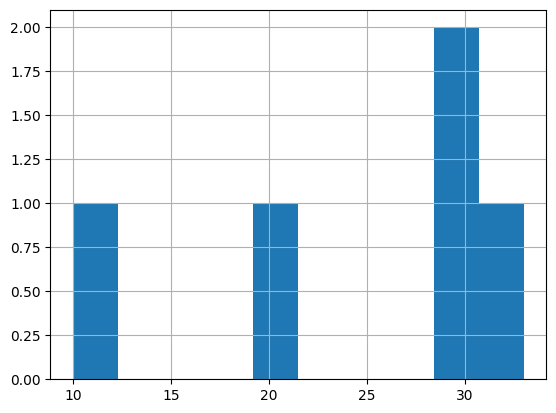

In [31]:
# Histograma empírico
d.faturamento.hist()

In [32]:
# Amplitude
d.faturamento.max() - d.faturamento.min()

23.0

In [33]:
# Desvio-padrão
d.faturamento.std()

9.418067742376882

In [34]:
# Desvio-padrão a partir da variância
(d.faturamento.var())**0.5

9.418067742376882

In [41]:
# desvio-padrão (cálculo alternativo)
(sum((d.faturamento.dropna() - media)**2)/4)**0.5

9.418067742376882

In [42]:
# covariância
d.faturamento.cov(d.ano)

65.0

In [43]:
# correlação
d.faturamento.corr(d.ano)

0.872994561234997

In [49]:
# Quantis
q3 = d.faturamento.quantile(0.75)
q1 = d.faturamento.quantile(0.25)

# Interquartílico
IIQ = q3 - q1
IIQ

9.0

In [51]:
# analisando assimetria nos dados
print(d.faturamento.median(), d.faturamento.mean())

30.0 24.8


In [52]:
# descrição estatística
d.describe()

ano  faturamento
count     6.000000     5.000000
mean   2007.500000    24.800000
std       9.354143     9.418068
min    1995.000000    10.000000
25%    2001.250000    21.000000
50%    2007.500000    30.000000
75%    2013.750000    30.000000
max    2020.000000    33.000000